# Student Placement Prediction - EDA Report
**Author:** Dhruvil Patel

## 1. Project Objective
To analyze student performance data, clean inconsistencies, and identify which factors (CGPA, IQ, Communication Skills) most strongly predict whether a student gets placed.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
#Read csv file
df = pd.read_csv('../data/placement_data.csv')
print(df.shape)
df.head()


(10000, 10)


,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [17]:
for col in df.columns:
    print(df[col].unique())
    print()


[107  97 109 122  96 123 111  92 108  93 103  71  74  91  84 104  86  78
 121 101  82 105  90  95 127  99 112  81  70  80 102  98  77  89 115  73
  94 113  87 114  83 120  60 100 106 128 136 117 132  85  76  88 119  75
 140 110 116  79 157 134  69 126 131  51 124  68 118 130 129  65 146 125
  72  62  66  59 138 139 137  67  63  57  56 133  61  64 147  55  54 141
 135 144  58 158 143 148 142  52 152  44  45  42 150  41]

[ 6.61  5.52  5.36  5.47  7.91  5.26  6.68  8.77  6.47  8.82  8.73  6.23
  8.64  8.74  6.99  6.05  7.61  9.61  8.2   5.86  8.41  7.14  7.96  8.67
  7.57  9.07  8.61  8.08  5.75  9.18  9.68  5.68  7.44  6.29  5.7   9.39
  5.9   8.99  7.28  6.64  5.79  5.84  8.31  7.75  5.61  5.56  8.72  8.56
  5.29  7.8   5.42  9.52  9.54  8.49  9.63  9.06  9.14  7.85  6.53  6.09
  8.14  7.34  6.17  7.94  9.62  8.33  5.93  9.47  6.24  5.46  8.75  5.88
  6.86  5.14  5.69  5.87  5.27  8.28  9.19  6.87  9.37  6.07  6.63  8.1
  7.1   8.07  8.81  7.73  6.5   6.8   8.59  8.06  5.89  6.88  7.41

In [4]:
#Checking missing values
df.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

No missing values found in the whole data

In [5]:
#Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


Now converting the object based columns into the numerical values so Ml model can work on it

In [ ]:
# mapping yes-->1 and no-->0
df['Placement']=df['Placement'].map({'Yes':1,'No':0})
df['Internship_Experience']=df['Internship_Experience'].map({'Yes':1,'No':0})
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  int64  
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 781.4+ KB


,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,0,8,8,4,0
1,CLG0061,97,5.52,5.37,8,0,7,8,0,0
2,CLG0036,109,5.36,5.83,9,0,3,1,1,0
3,CLG0055,122,5.47,5.75,6,1,1,6,1,0
4,CLG0004,96,7.91,7.69,7,0,8,10,2,0


Dropping column of the college id as it does not help in making prediction of the placement.

In [7]:
df = df.drop(columns=['College_ID'])
df.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,0,8,8,4,0
1,97,5.52,5.37,8,0,7,8,0,0
2,109,5.36,5.83,9,0,3,1,1,0
3,122,5.47,5.75,6,1,1,6,1,0
4,96,7.91,7.69,7,0,8,10,2,0


In [15]:
#Statistical Summary (Mean, Median, Min, Max)
print("Statistical Summary")
display(df.describe().T)

Statistical Summary


,count,mean,std,min,25%,50%,75%,max
IQ,10000.0,99.471800,15.053101,41.00,89.00,99.00,110.00,158.00
Prev_Sem_Result,10000.0,7.535673,1.447519,5.00,6.29,7.56,8.79,10.00
CGPA,10000.0,7.532379,1.470141,4.54,6.29,7.55,8.77,10.46
Academic_Performance,10000.0,5.546400,2.873477,1.00,3.00,6.00,8.00,10.00
Internship_Experience,10000.0,0.396400,0.489174,0.00,0.00,0.00,1.00,1.00
Extra_Curricular_Score,10000.0,4.970900,3.160103,0.00,2.00,5.00,8.00,10.00
Communication_Skills,10000.0,5.561800,2.900866,1.00,3.00,6.00,8.00,10.00
Projects_Completed,10000.0,2.513400,1.715959,0.00,1.00,3.00,4.00,5.00
Placement,10000.0,0.165900,0.372009,0.00,0.00,0.00,0.00,1.00


Creating distribution plots for CGPA and IQ

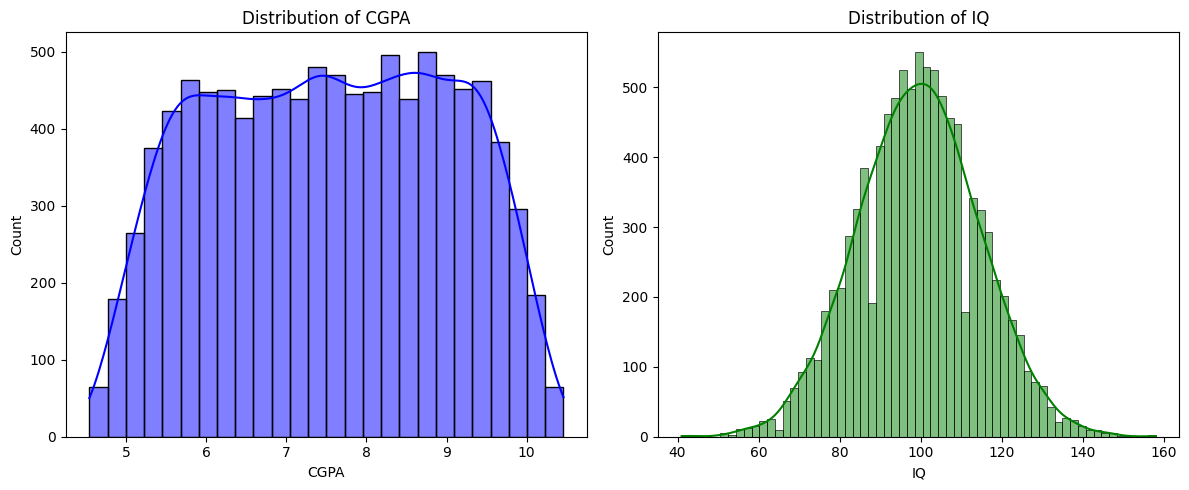

In [9]:
plt.figure(figsize=(12, 5))

# Plot 1: CGPA
plt.subplot(1, 2, 1)
sns.histplot(df['CGPA'], kde=True, color='blue')
plt.title('Distribution of CGPA')

# Plot 2: IQ
plt.subplot(1, 2, 2)
sns.histplot(df['IQ'], kde=True, color='green')
plt.title('Distribution of IQ')

plt.tight_layout()
plt.show()

Generating Heatmap to see correlation of feature with placement

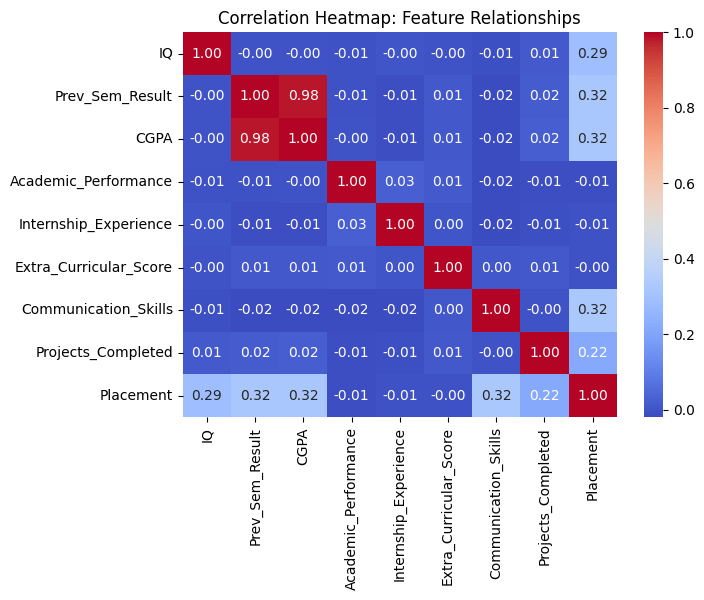

In [10]:
plt.figure(figsize=(7,5))

numeric_df=df.select_dtypes(include=['float64', 'int64'])

# Generate the Heatmap
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm',fmt=".2f")

plt.title("Correlation Heatmap: Feature Relationships")
plt.show()

Feature Relationships (Box Plots)

C:\Users\Dhruvil Patel\AppData\Local\Temp\ipykernel_8520\3455571755.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Placement', y='CGPA', data=df, palette='Set2')
C:\Users\Dhruvil Patel\AppData\Local\Temp\ipykernel_8520\3455571755.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Placement', y='IQ', data=df, palette='Set2')


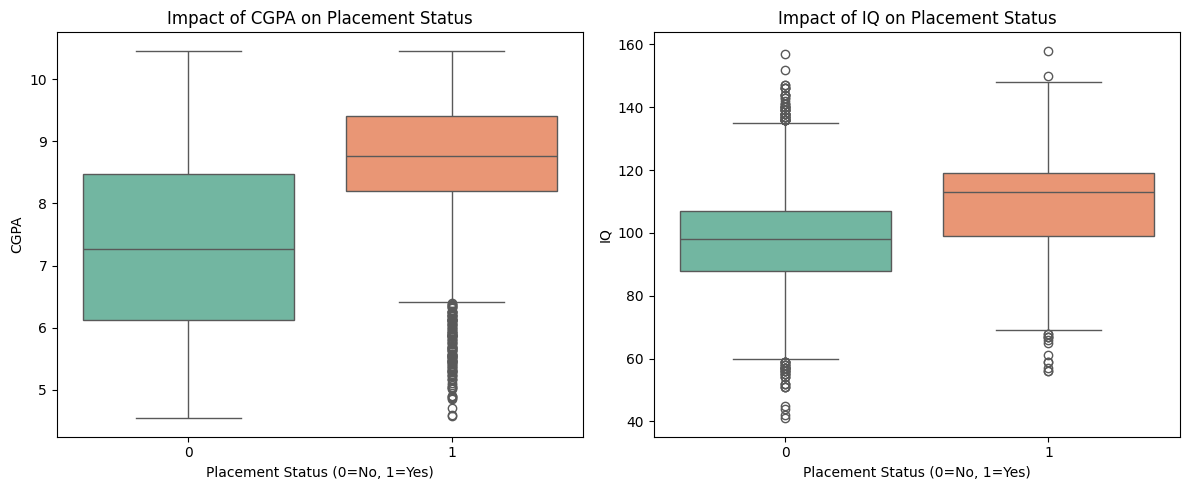

In [11]:
plt.figure(figsize=(12, 5))

# Plot 1: CGPA vs Placement
plt.subplot(1, 2, 1)
# x = Categorical column, y = Numerical column
sns.boxplot(x='Placement', y='CGPA', data=df, palette='Set2')
plt.title("Impact of CGPA on Placement Status")
plt.xlabel("Placement Status (0=No, 1=Yes)")

# Plot 2: IQ vs Placement
plt.subplot(1, 2, 2)
sns.boxplot(x='Placement', y='IQ', data=df, palette='Set2')
plt.title("Impact of IQ on Placement Status")
plt.xlabel("Placement Status (0=No, 1=Yes)")

plt.tight_layout()
plt.show()

Violin Plot

C:\Users\Dhruvil Patel\AppData\Local\Temp\ipykernel_8520\2033328342.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Placement', y='Communication_Skills', data=df, palette='muted')
C:\Users\Dhruvil Patel\AppData\Local\Temp\ipykernel_8520\2033328342.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Placement', y='Projects_Completed', data=df, palette='muted')


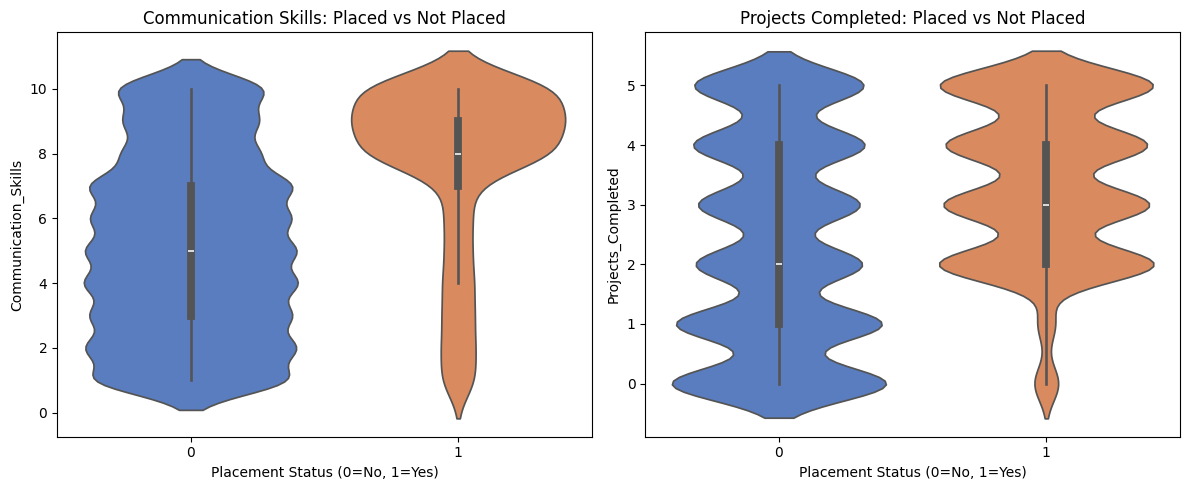

In [ ]:
plt.figure(figsize=(12, 5))

# Plot 1: Violin Plot for Communication Skills
plt.subplot(1, 2, 1)
sns.violinplot(x='Placement', y='Communication_Skills', data=df, palette='muted')
plt.title("Communication Skills: Placed vs Not Placed")
plt.xlabel("Placement Status (0=No, 1=Yes)")

# Plot 2: Violin Plot for Projects Completed
plt.subplot(1, 2, 2)
sns.violinplot(x='Placement', y='Projects_Completed', data=df, palette='muted')
plt.title("Projects Completed: Placed vs Not Placed")
plt.xlabel("Placement Status (0=No, 1=Yes)")

plt.tight_layout()
plt.show()

Categorical Count Plots (Internship vs. Placement)

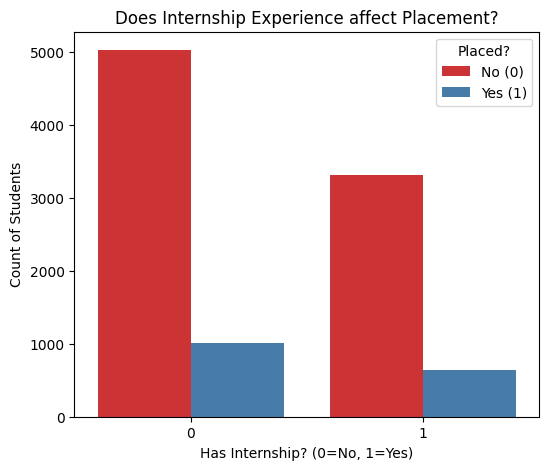

In [ ]:
plt.figure(figsize=(6, 5))

# Comparison of two categorical variables
sns.countplot(x='Internship_Experience', hue='Placement', data=df, palette='Set1')

plt.title("Does Internship Experience affect Placement?")
plt.xlabel("Has Internship? (0=No, 1=Yes)")
plt.ylabel("Count of Students")
plt.legend(title='Placed?', labels=['No (0)', 'Yes (1)'])

plt.show()